In [4]:
!pip install dataframe_image

     ---------------------------------------- 0.0/65.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/65.8 kB ? eta -:--:--
     ----------------------- -------------- 41.0/65.8 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 65.8/65.8 kB 712.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.7 MB 1.3 MB/s eta 0:00:06
   ---------------------------------------- 0.1/6.7 MB 787.7 kB/s eta 0:00:09
    --------------------------------------- 0.1/6.7 MB 845.5 kB/s eta 0:00:08
    --------------------------------------- 0.2/6.7 MB 833.5 kB/s eta 0:00:08
   - -------------------------------------- 0.2/6.7 MB 807.1 kB/s eta 0:00:09
   - -------------------------------------- 0.2/6.7 MB 654.4 kB/s eta 0:00:10
   - -------------------------------------- 0.2/6.7 MB 722.1 kB/s eta 0:00:09
   - -------------------------------------- 0.3/6.7 MB 770.1 kB/s eta 0:00:09
   -


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [7]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [8]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
df = df.drop(columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'time', 'DEATH_EVENT'])


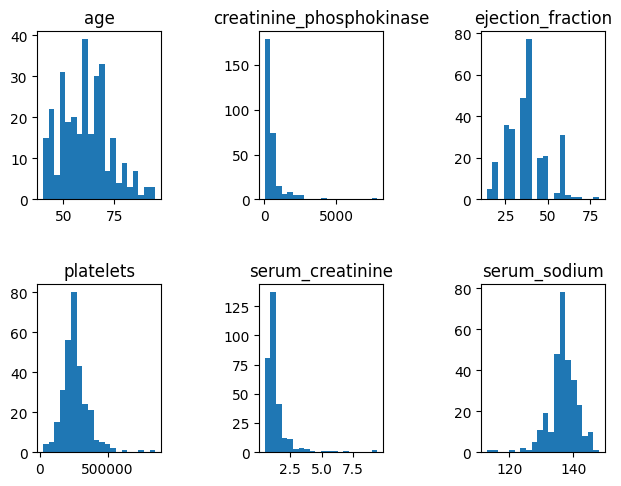

In [10]:
n_bins = 20
fig, axs = plt.subplots(2,3)
fig. tight_layout (h_pad=4, w_pad=4)
axs[0, 0].hist(df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(df['serum_sodium'].values, bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.savefig('hist_before.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
age_min = np.min(df['age'])
age_max = np.max(df['age'])
age_max_count_value = df['age'].value_counts().idxmax()
age_min, age_max, age_max_count_value

(np.float64(40.0), np.float64(95.0), np.float64(60.0))

In [12]:
creatinine_min = np.min(df['creatinine_phosphokinase'])
creatinine_max = np.max(df['creatinine_phosphokinase'])
creatinine_max_count_value = df['creatinine_phosphokinase'].value_counts().idxmax()
creatinine_min, creatinine_max, creatinine_max_count_value

(np.int64(23), np.int64(7861), np.int64(582))

In [13]:
ejection_min = np.min(df['ejection_fraction'])
ejection_max = np.max(df['ejection_fraction'])
ejection_max_count_value = df['ejection_fraction'].value_counts().idxmax()
ejection_min, ejection_max, ejection_max_count_value

(np.int64(14), np.int64(80), np.int64(35))

In [14]:
platelets_min = np.min(df['platelets'])
platelets_max = np.max(df['platelets'])
platelets_max_count_value = df['platelets'].value_counts().idxmax()
platelets_min, platelets_max, platelets_max_count_value

(np.float64(25100.0), np.float64(850000.0), np.float64(263358.03))

In [15]:
serum_creatinine_min = np.min(df['serum_creatinine'])
serum_creatinine_max = np.max(df['serum_creatinine'])
serum_creatinine_max_count_value = df['serum_creatinine'].value_counts().idxmax()
serum_creatinine_min, serum_creatinine_max, serum_creatinine_max_count_value

(np.float64(0.5), np.float64(9.4), np.float64(1.0))

In [16]:
serum_sodium_min = np.min(df['serum_sodium'])
serum_sodium_max = np.max(df['serum_sodium'])
serum_sodium_max_count_value = df['serum_sodium'].value_counts().idxmax()
serum_sodium_min, serum_sodium_max, serum_sodium_max_count_value

(np.int64(113), np.int64(148), np.int64(136))

In [17]:
data = df.to_numpy(dtype='float')
data

array([[7.5000000e+01, 5.8200000e+02, 2.0000000e+01, 2.6500000e+05,
        1.9000000e+00, 1.3000000e+02],
       [5.5000000e+01, 7.8610000e+03, 3.8000000e+01, 2.6335803e+05,
        1.1000000e+00, 1.3600000e+02],
       [6.5000000e+01, 1.4600000e+02, 2.0000000e+01, 1.6200000e+05,
        1.3000000e+00, 1.2900000e+02],
       ...,
       [4.5000000e+01, 2.0600000e+03, 6.0000000e+01, 7.4200000e+05,
        8.0000000e-01, 1.3800000e+02],
       [4.5000000e+01, 2.4130000e+03, 3.8000000e+01, 1.4000000e+05,
        1.4000000e+00, 1.4000000e+02],
       [5.0000000e+01, 1.9600000e+02, 4.5000000e+01, 3.9500000e+05,
        1.6000000e+00, 1.3600000e+02]])

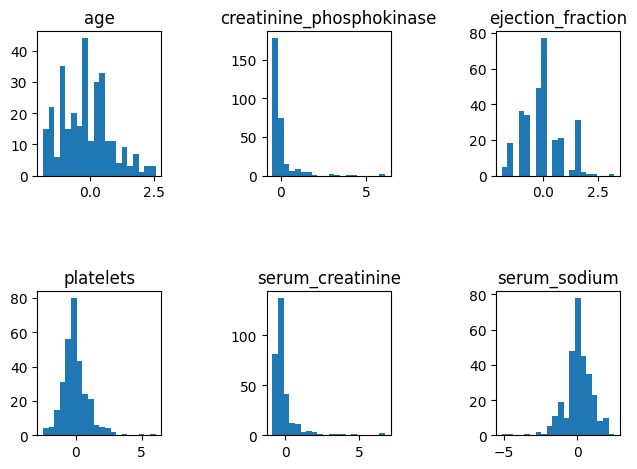

In [18]:
n_bins = 20
scaler = preprocessing.StandardScaler().fit(data[:150,:])
data_scaled = scaler.transform(data)
fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.tight_layout(h_pad=5, w_pad=5)
plt.savefig('hist_scaled.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
for index, col in enumerate(df.columns):
    mean = df[col].mean().round(3)
    var = df[col].var().round(3)
    mean_scaled = data_scaled[:, index].mean().round(3)
    var_scaled = data_scaled[:, index].var().round(3)
    std = df[col].std().round(3)
    print()
    print(f'Сравнение данных столбца: {col}')
    print(f'Математическое ожидание до стандартизации: {mean}')
    print(f'Математическое ожидание после стандартизации: {mean_scaled}')
    print(f'СКО до стандартизации: {var}')
    print(f'СКО после стандартизации: {var_scaled}')
    print(f'Формула для стандартизации данных: (x - {mean}/({std}))')
    print(f'scaler.mean_: {scaler.mean_[index].round(3)}')
    print(f'scaler.var_: {scaler.var_[index].round(3)}')


Сравнение данных столбца: age
Математическое ожидание до стандартизации: 60.834
Математическое ожидание после стандартизации: -0.17
СКО до стандартизации: 141.486
СКО после стандартизации: 0.91
Формула для стандартизации данных: (x - 60.834/(11.895))
scaler.mean_: 62.947
scaler.var_: 154.997

Сравнение данных столбца: creatinine_phosphokinase
Математическое ожидание до стандартизации: 581.839
Математическое ожидание после стандартизации: -0.021
СКО до стандартизации: 941458.571
СКО после стандартизации: 0.663
Формула для стандартизации данных: (x - 581.839/(970.288))
scaler.mean_: 607.153
scaler.var_: 1415488.823

Сравнение данных столбца: ejection_fraction
Математическое ожидание до стандартизации: 38.084
Математическое ожидание после стандартизации: 0.011
СКО до стандартизации: 140.063
СКО после стандартизации: 0.821
Формула для стандартизации данных: (x - 38.084/(11.835))
scaler.mean_: 37.947
scaler.var_: 170.024

Сравнение данных столбца: platelets
Математическое ожидание до станд

In [20]:
scaler_all = preprocessing.StandardScaler()
data_scaled = scaler_all.fit_transform(data[:,:])
for index, col in enumerate(df.columns):
    mean = df[col].mean().round(3)
    var = df[col].var().round(3)
    mean_scaled = data_scaled[:, index].mean().round(3)
    var_scaled = data_scaled[:, index].var().round(3)
    std = df[col].std().round(3)
    print()
    print(f'Сравнение данных столбца: {col}')
    print(f'Математическое ожидание до стандартизации: {mean}')
    print(f'Математическое ожидание после стандартизации: {mean_scaled}')
    print(f'СКО до стандартизации: {var}')
    print(f'СКО после стандартизации: {var_scaled}')
    print(f'Формула для стандартизации данных: (x - {mean}/({std}))')
    print(f'scaler.mean_: {scaler.mean_[index].round(3)}')
    print(f'scaler.var_: {scaler.var_[index].round(3)}')


Сравнение данных столбца: age
Математическое ожидание до стандартизации: 60.834
Математическое ожидание после стандартизации: 0.0
СКО до стандартизации: 141.486
СКО после стандартизации: 1.0
Формула для стандартизации данных: (x - 60.834/(11.895))
scaler.mean_: 62.947
scaler.var_: 154.997

Сравнение данных столбца: creatinine_phosphokinase
Математическое ожидание до стандартизации: 581.839
Математическое ожидание после стандартизации: 0.0
СКО до стандартизации: 941458.571
СКО после стандартизации: 1.0
Формула для стандартизации данных: (x - 581.839/(970.288))
scaler.mean_: 607.153
scaler.var_: 1415488.823

Сравнение данных столбца: ejection_fraction
Математическое ожидание до стандартизации: 38.084
Математическое ожидание после стандартизации: -0.0
СКО до стандартизации: 140.063
СКО после стандартизации: 1.0
Формула для стандартизации данных: (x - 38.084/(11.835))
scaler.mean_: 37.947
scaler.var_: 170.024

Сравнение данных столбца: platelets
Математическое ожидание до стандартизации: 

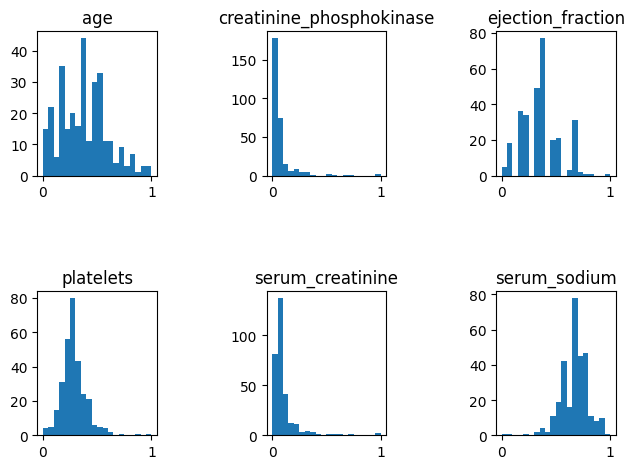

In [21]:
n_bins = 20
min_max_scaler = preprocessing.MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(data[:,:])

fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_min_max_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_min_max_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_min_max_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_min_max_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_min_max_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_min_max_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

plt.tight_layout(h_pad=5, w_pad=5)
plt.savefig('hist_MinMaxScaler', dpi=300, bbox_inches='tight')
plt.show()

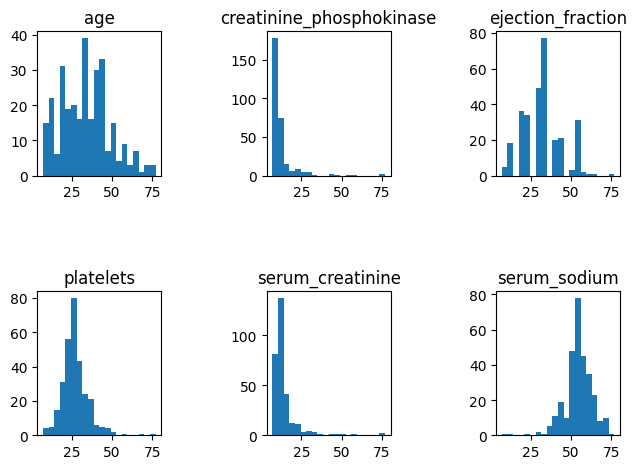

In [22]:
n_bins = 20
min_max_scaler_7_77 = preprocessing.MinMaxScaler((7,77))
data_min_max_scaled_7_77 = min_max_scaler_7_77.fit_transform(data[:,:])

fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_min_max_scaled_7_77[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_min_max_scaled_7_77[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_min_max_scaled_7_77[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_min_max_scaled_7_77[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_min_max_scaled_7_77[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_min_max_scaled_7_77[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')

plt.tight_layout(h_pad=5, w_pad=5)
plt.savefig('hist_MinMaxScaler_7_77', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
min_max_scaler = preprocessing.MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(data[:,:])

for index, col in enumerate(df.columns):
    print()
    print(f'Столбец: {col}')
    print(f'Минимальное значение признака: {min_max_scaler.data_min_[index].round(3)}')
    print(f'Максимальное значение признака: {min_max_scaler.data_max_[index].round(3)}')


Столбец: age
Минимальное значение признака: 40.0
Максимальное значение признака: 95.0

Столбец: creatinine_phosphokinase
Минимальное значение признака: 23.0
Максимальное значение признака: 7861.0

Столбец: ejection_fraction
Минимальное значение признака: 14.0
Максимальное значение признака: 80.0

Столбец: platelets
Минимальное значение признака: 25100.0
Максимальное значение признака: 850000.0

Столбец: serum_creatinine
Минимальное значение признака: 0.5
Максимальное значение признака: 9.4

Столбец: serum_sodium
Минимальное значение признака: 113.0
Максимальное значение признака: 148.0


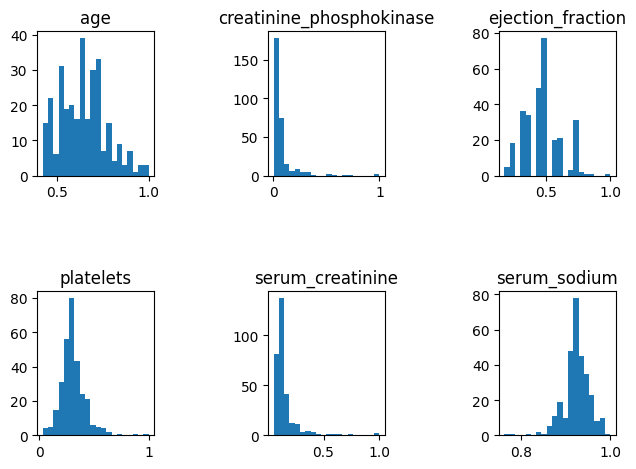

In [24]:
n_bins = 20
max_abs_scaled = preprocessing.MaxAbsScaler().fit_transform(data)

fig, axs = plt.subplots(2,3)
axs[0, 0].hist(max_abs_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(max_abs_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(max_abs_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(max_abs_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(max_abs_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(max_abs_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.tight_layout(h_pad=5, w_pad=5)
plt.savefig('hist_MaxAbsScaler', dpi=300, bbox_inches='tight')
plt.show()

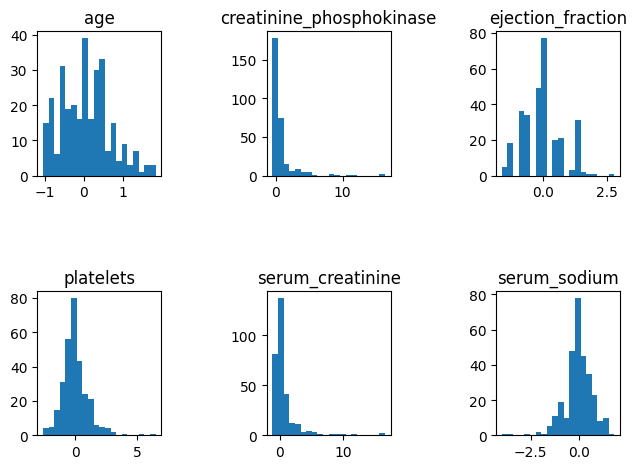

In [25]:
n_bins = 20
robust_scaled = preprocessing.RobustScaler().fit_transform(data)

fig, axs = plt.subplots(2,3)
axs[0, 0].hist(robust_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(robust_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(robust_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(robust_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(robust_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(robust_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.tight_layout(h_pad=5, w_pad=5)
plt.savefig('hist_RobustScaler', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
def scale_columns_to_range(arr, min_val=-5, max_val=10):
    """
    :param arr: Numpy-массив (2D)
    :param min_val: Минимальное значение диапазона
    :param max_val: Максимальное значение диапазона
    :return: Масштабированный массив
    """
    # Проверка, что входной массив является 2D
    if arr.ndim != 2:
        raise ValueError("Входной массив должен быть 2D.")

    # Скопируем массив, чтобы не изменять оригинал
    scaled_arr = np.empty_like(arr, dtype=np.float64)

    for i in range(arr.shape[1]):  # Проходим по каждому столбцу
        col = arr[:, i]
        col_min = np.min(col)
        col_max = np.max(col)

        # Нормализация столбца
        scaled_col = (col - col_min) / (col_max - col_min)  # Приводим к диапазону [0, 1]
        scaled_col = scaled_col * (max_val - min_val) + min_val  # Масштабируем к [min_val, max_val]

        # Сохраняем результат в новый массив
        scaled_arr[:, i] = scaled_col

    return scaled_arr

scaled_data = scale_columns_to_range(data)
scaled_data

array([[ 4.54545455, -3.93021179, -3.63636364, -0.63765305, -2.64044944,
         2.28571429],
       [-0.90909091, 10.        ,  0.45454545, -0.66751067, -3.98876404,
         4.85714286],
       [ 1.81818182, -4.76460832, -3.63636364, -2.51060735, -3.65168539,
         1.85714286],
       ...,
       [-3.63636364, -1.1016841 ,  5.45454545,  8.03612559, -4.49438202,
         5.71428571],
       [-3.63636364, -0.42612911,  0.45454545, -2.91065584, -3.48314607,
         6.57142857],
       [-2.27272727, -4.66892064,  2.04545455,  1.72626985, -3.14606742,
         4.85714286]])

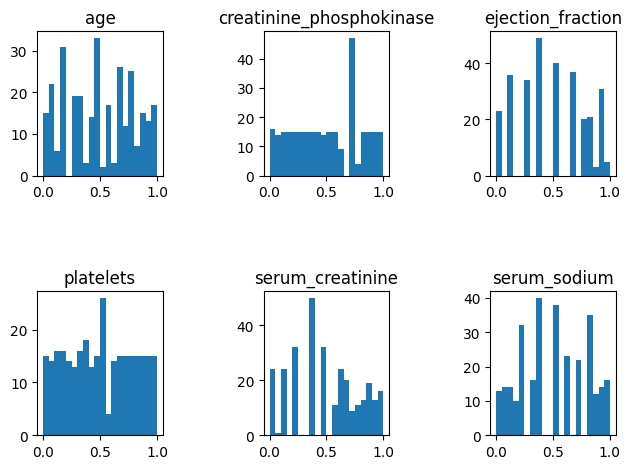

In [27]:
n_bins = 20
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles = 299, random_state = 0, output_distribution = 'uniform').fit(data)
data_quantile_scaled = quantile_transformer.transform(data)
fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_quantile_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_quantile_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_quantile_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_quantile_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_quantile_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_quantile_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.tight_layout(h_pad=5, w_pad=5)
plt.savefig('hist_QuantileTransformer_uniform.png', dpi=300, bbox_inches='tight')
plt.show()

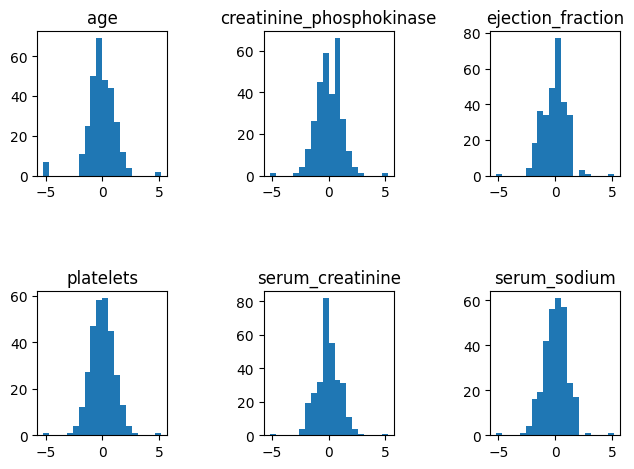

In [28]:
n_bins = 20
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles = 299, random_state = 0, output_distribution = 'normal').fit(data)
data_quantile_scaled = quantile_transformer.transform(data)
fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_quantile_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(data_quantile_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(data_quantile_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(data_quantile_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(data_quantile_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(data_quantile_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.tight_layout(h_pad=5, w_pad=5)
plt.savefig('hist_QuantileTransformer_normal.png', dpi=300, bbox_inches='tight')
plt.show()

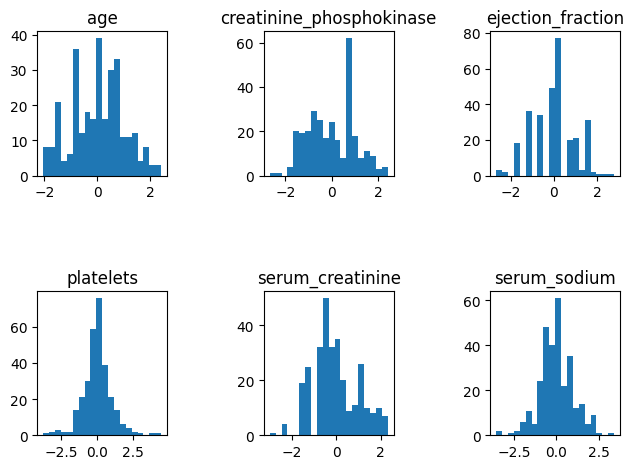

In [29]:
from sklearn.preprocessing import PowerTransformer
n_bins = 20
pt = PowerTransformer()
pt.fit(data)
a = pt.transform(data)
fig, axs = plt.subplots(2,3)
axs[0, 0].hist(a[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(a[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(a[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(a[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(a[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(a[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.tight_layout(h_pad=5, w_pad=5)
plt.savefig('hist_PowerTransformer.png', dpi=300, bbox_inches='tight')
plt.show()

Признак age:
  Интервал 1: [40.0, 58.33333333333333)
  Интервал 2: [58.33333333333333, 76.66666666666666)
  Интервал 3: [76.66666666666666, 95.0)


Признак creatinine_phosphokinase:
  Интервал 1: [23.0, 1982.5)
  Интервал 2: [1982.5, 3942.0)
  Интервал 3: [3942.0, 5901.5)
  Интервал 4: [5901.5, 7861.0)


Признак ejection_fraction:
  Интервал 1: [14.0, 36.0)
  Интервал 2: [36.0, 58.0)
  Интервал 3: [58.0, 80.0)


Признак platelets:
  Интервал 1: [25100.0, 107590.0)
  Интервал 2: [107590.0, 190080.0)
  Интервал 3: [190080.0, 272570.0)
  Интервал 4: [272570.0, 355060.0)
  Интервал 5: [355060.0, 437550.0)
  Интервал 6: [437550.0, 520040.0)
  Интервал 7: [520040.0, 602530.0)
  Интервал 8: [602530.0, 685020.0)
  Интервал 9: [685020.0, 767510.0)
  Интервал 10: [767510.0, 850000.0)


Признак serum_creatinine:
  Интервал 1: [0.5, 4.95)
  Интервал 2: [4.95, 9.4)


Признак serum_sodium:
  Интервал 1: [113.0, 121.75)
  Интервал 2: [121.75, 130.5)
  Интервал 3: [130.5, 139.25)
  Интервал 4: [139.25

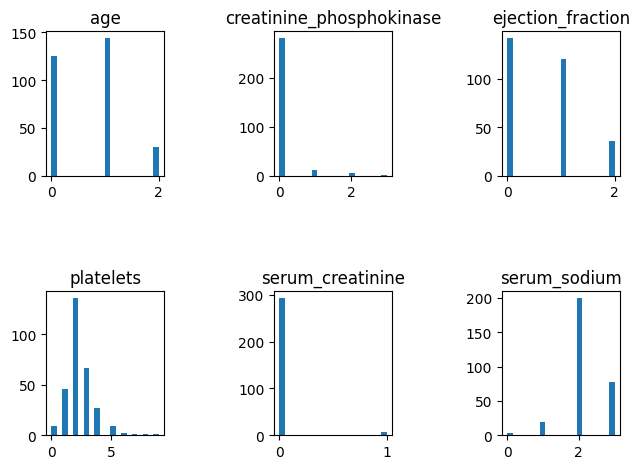

In [30]:
from sklearn.preprocessing import KBinsDiscretizer

def KBD(bins, column, name_column):
    kbd = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    Binned = kbd.fit_transform(data[:, column].reshape(-1, 1))
    for i, edges in enumerate(kbd.bin_edges_):
        print(f"Признак {name_column}:")
        for j in range(len(edges) - 1):
            print(f"  Интервал {j + 1}: [{edges[j]}, {edges[j + 1]})")
        print('\n')
        return Binned
age_binned = KBD(3, 0, 'age')
creatinine_phosphokinase_binned = KBD(4, 1, 'creatinine_phosphokinase')
ejection_fraction_binned = KBD(3, 2, 'ejection_fraction')
platelets_binned = KBD(10, 3, 'platelets')
serum_creatinine_binned = KBD(2, 4, 'serum_creatinine')
serum_sodium_binned = KBD(4, 5, 'serum_sodium')


array_binned = np.hstack((age_binned,
                          creatinine_phosphokinase_binned,
                          ejection_fraction_binned, 
                          platelets_binned, 
                          serum_creatinine_binned, 
                          serum_sodium_binned))
array_binned

fig, axs = plt.subplots(2,3)
axs[0, 0].hist(array_binned[:,0], bins = n_bins)
axs[0, 0].set_title('age')

axs[0, 1].hist(array_binned[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')

axs[0, 2].hist(array_binned[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')

axs[1, 0].hist(array_binned[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')

axs[1, 1].hist(array_binned[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')

axs[1, 2].hist(array_binned[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.tight_layout(h_pad=5, w_pad=5)
plt.savefig('hist_KBinsDiscretizer.png', dpi=300, bbox_inches='tight')
plt.show()